In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Pseudo Code
for j = 0, 1, ..., n do
    cj = fj
end for
for k = 1, ..., n do
    for j = n, n − 1, ..., k do
        cj = (cj − cj−1)/(xj − xj−k)
    end for
end for

p = cn
for j = n, n − 1, ..., 0 do
p = cj + (x − xj )p
end for


In [39]:
#Suppose f(x) = 3 + 4x + x^2 -3x^3
n = 11
xvalues = [None] * n
fvalues = [None] * n
cvalues = [None] * n


for j in range(0,n):
    xvalues[j] = -5 + j* (10/(n-1))
    fvalues[j] = 3 + 4*xvalues[j] + xvalues[j] ** 2 - 3 * xvalues[j] ** 3
    cvalues[j] = fvalues[j]

for k in range(1,n+1):
    #print("running outside loop")
    for j in reversed(range(k,n)):
        #print(xvalues[j])
        #print(xvalues[j-k])
        cvalues[j] = (cvalues[j] - cvalues[j-1]) / (xvalues[j] - xvalues[j-k])

x = float(input("Pick an x values:  ") )     

p = cvalues[n-1]
for j in reversed(range(n)):
    p = cvalues[j] + (x - xvalues[j]) * p
    
print(p)
#Since we are approximating a degree 3 polynomial and we have 11 points our estimate 
#should be exactly the fvalue for the actual polynomial 
#This test shows the formual is working because f(-0.75) = 1.828125 

Pick an x values:  -0.75
1.828125


In [93]:
#Creates the polynomial of degree 10
def polyapprox(x):
    n = 11
    xvalues = [None] * n
    fvalues = [None] * n
    cvalues = [None] * n
    


    for j in range(0,n):
        xvalues[j] = round(-1 + j* (2/(n-1)),3)
        fvalues[j] = np.exp(-1 * xvalues[j] ** 2)
        cvalues[j] = fvalues[j]
        
    #print(xvalues)

    for k in range(1,n+1):
        for j in reversed(range(k,n)):
            cvalues[j] = (cvalues[j] - cvalues[j-1]) / (xvalues[j] - xvalues[j-k])
     
    #Creates the Horner-like scheme
    p = cvalues[n-1]
    for j in reversed(range(n)):
        p = cvalues[j] + (x - xvalues[j]) * p
    
    return p

In [94]:
def evalpoly(ylist):
    errors = [None] * len(ylist)
    for elements in range(len(ylist)):
        errors[elements] = round(np.exp(-1 * ylist[elements] ** 2) - polyapprox(ylist[elements]),15)
        
    
    #return errors
    plt.plot(ylist,errors,label = 'Errors')
    plt.ylim(-0.00006,0.00006)
    plt.xlim(-1.1,1.1)
    plt.legend()
        
                          

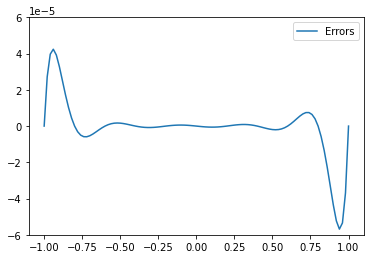

In [95]:
ylist = [None] * 101
for e in range(len(ylist)):
    ylist[e] = round(-1 + e*(2/100),3)
    
    
evalpoly(ylist)